## Задание 1.

Посчитайте частоты для 5-грамм в корпусе lenta.txt. двумя способами:  
1) lenta.txt -> sent_tokenize (russian) -> word_tokenize -> ngrammer  
2) lenta.txt -> word_tokene(preserve_line=True) - ngrammer  
    
Проанализируйте топ-20 самых частотных нграмм и проверьте есть ли различия?

Ответ: основное различие - в первом способе в списках учитываются стоп слова и они удаляются (то есть 5-граммы более информативные), во втором случае стоп-слова остаются и влезают в топ-20

In [24]:
!pip install nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
!mkdir data
!wget https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip -P data
!unzip -o data/lenta.txt.zip -d data/

--2025-09-18 11:44:51--  https://github.com/mannefedov/compling_nlp_hse_course/raw/master/data/lenta.txt.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip [following]
--2025-09-18 11:44:52--  https://raw.githubusercontent.com/mannefedov/compling_nlp_hse_course/master/data/lenta.txt.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5723675 (5.5M) [application/zip]
Saving to: ‘data/lenta.txt.zip’

lenta.txt.zip       100%[===================>]   5.46M  --.-KB/s    in 0.02s   

2025-09-18 11:44:52 (243 MB/s) - ‘data/lenta.txt.zip’ sav

In [35]:
# Первый способ
import nltk
import re
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

russian_stopwords = set(stopwords.words('russian'))

corpus = open('data/lenta.txt').read()
#corpus[:1000]

sentences = sent_tokenize(corpus, language="russian")
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

def ngrammer(tokens, n=5):
  ngrams = []
  for i in range(len(tokens)-n+1):
      ngrams.append(' '.join(tokens[i:i+n]))
  return ngrams

fivegram_counts = Counter()
for sentence in tokenized_sentences:
    tokens = [token.lower() for token in sentence
              if token.lower() not in russian_stopwords and re.match(r'\w+', token)]
    fivegram_counts.update(ngrammer(tokens, 5))

fivegram_counts.most_common(20)

[('объединенной группировки войск северном кавказе', 83),
 ('сообщает риа новости ссылкой пресс-службу', 57),
 ('обязанности президента россии владимир путин', 47),
 ('группировки федеральных сил северном кавказе', 37),
 ('помощник президента россии сергей ястржембский', 35),
 ('делам печати телерадиовещания средств массовых', 31),
 ('объединенной группировки федеральных сил северном', 31),
 ('печати телерадиовещания средств массовых коммуникаций', 30),
 ('штабе объединенной группировки федеральных сил', 25),
 ('министр иностранных дел россии игорь', 24),
 ('первый заместитель начальника генерального штаба', 23),
 ('сообщает риа новости ссылкой источники', 23),
 ('объединенной группировкой войск северном кавказе', 23),
 ('иностранных дел россии игорь иванов', 23),
 ('прямом эфире радиостанции эхо москвы', 20),
 ('главного управления борьбе организованной преступностью', 20),
 ('начальника генерального штаба вооруженных сил', 20),
 ('заместитель начальника генштаба вооруженных сил', 20)

In [ ]:
#Второй способ
import nltk
import re
from collections import Counter
from nltk.tokenize import word_tokenize

corpus = open('data/lenta.txt').read()
#corpus[:1000]

tokens = word_tokenize(corpus, preserve_line=True)
filtered_tokens = [token.lower() for token in tokens if re.match(r'\w+', token)]

def ngrammer(tokens, n=5):
  ngrams = []
  for i in range(len(tokens)-n+1):
      ngrams.append(' '.join(tokens[i:i+n]))
  return ngrams

fivegram_counts = Counter()
if len(filtered_tokens) >= 5:
    fivegram_counts.update(ngrammer(filtered_tokens, 5))

fivegram_counts.most_common(20)

[('риа новости со ссылкой на', 400),
 ('сообщает риа новости со ссылкой', 320),
 ('как сообщили риа новости в', 196),
 ('как сообщает риа новости со', 149),
 ('сообщает интерфакс со ссылкой на', 142),
 ('сообщает итар-тасс со ссылкой на', 118),
 ('об этом риа новости сообщили', 113),
 ('об этом сообщает риа новости', 104),
 ('этом риа новости сообщили в', 99),
 ('со ссылкой на источники в', 93),
 ('сообщили риа новости в пресс-службе', 88),
 ('как сообщает интерфакс со ссылкой', 83),
 ('объединенной группировки войск на северном', 83),
 ('эхо москвы со ссылкой на', 77),
 ('новости со ссылкой на пресс-службу', 76),
 ('этом сообщает риа новости со', 75),
 ('в связи с тем что', 70),
 ('как сообщает итар-тасс со ссылкой', 58),
 ('группировки войск на северном кавказе', 57),
 ('по борьбе с организованной преступностью', 55)]

## Задание 2.

Найдите какую-то инетересную (по вашему мнению) закономерность на https://books.google.com/ngrams/ для русского языка (с 1990 по 2022)

Вставьте сюда скриншот

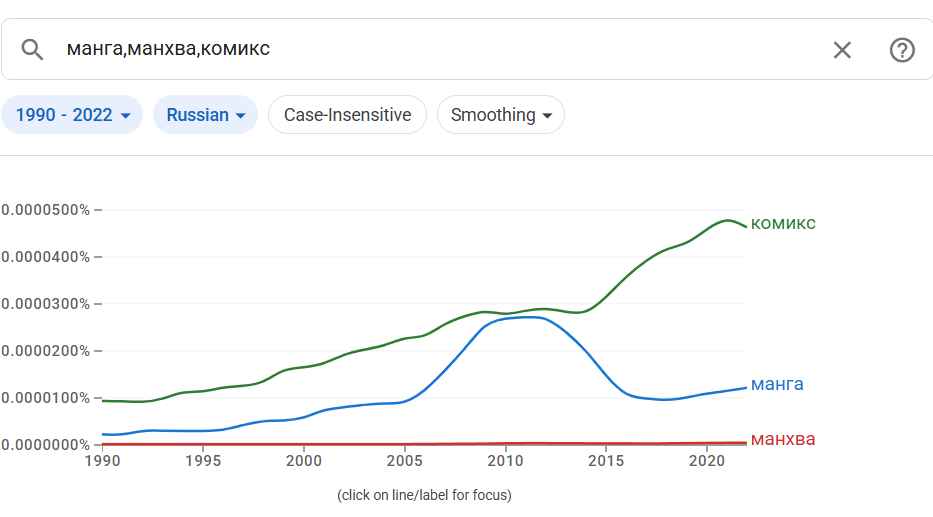

было интересно посмотреть на эти три слова, потому что интерисуюсь комиксами Азии (в частности Кореи и Японии) и очень интересно наблюдать с тем, как корейские комиксы чуть ли не равны нулю, а манга так "скачет"
А вот падение "комикса" скорее закономерно, чем случайно

## Заданиe 3

Когда мы разбирали PMI мы использовали такую функцию:

In [ ]:
def scorer_simple(word_count_a, word_count_b, bigram_count, *args):
    try:
        score = bigram_count/((word_count_a+word_count_b))
    except ZeroDivisionError:
        return 0
    return score

Но если вы посмотрите на определение в википедии, то увидите, что формула немного другая ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/094243d23c19d2d032f6bb26c4dc4f47d98d32f8)

Перепишите функцию, чтобы она точно соответствовала этому определению. Расчитайте PMI для всех биграммов также как мы делали в семинаре с помощью функции score_bigrams используя изначальный scorer и обновленный. Посмотрите есть ли разница в топ-10 биграммов. Подумайте почему результаты совпадают/отличаются?

*Подсказка: для вероятностей можно поделить на количество слов в корпусе

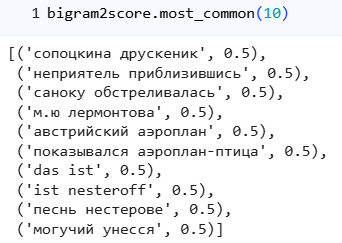
ТОП-10 со старым scorer


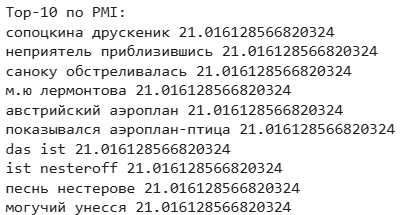
ТОП-10 по PMI

In [11]:
# Новый scorer
import math

def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words, *args):
    try:
      pa = word_count_a / total_words
      pb = word_count_b / total_words
      pab = bigram_count / total_words
      pmi = math.log2 (pab / (pa * pb))
    except (ZeroDivisionError, ValueError):
        return 0
    return pmi

## Задание 4*

Обновите функцию получившуюся в предыдущем задании так, чтобы вместо произведения/деления вероятностей использовались сложение и вычитание логирифмов.

In [ ]:
def scorer_pmi(word_count_a, word_count_b, bigram_count, total_words, *args):
    try:
      pa = word_count_a / total_words
      pb = word_count_b / total_words
      pab = bigram_count / total_words
      pmi = math.log2(pab) - math.log2(pa) - math.log2(pb)
    except (ZeroDivisionError, ValueError):
        return 0
    return pmi

## Задание 5

Исследуйте gensim.models.Phrases. Проверьте сколько дефолтных scoring функций есть в этом классе. Попробуйте все доступные по умолчанию scoring функции и попробуйте настраивать для них значение threshold и min_count. Попробуйте сделать так, чтобы собиралось как можно больше нграммов. Попробуйте строить последовательность gensim.models.Phrases, чтобы строить более длинные нграммы